In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from cmath import exp, sqrt, pi, cos, sin
from scipy.integrate import quad

In [2]:
class HydrogenicAtom:
    """
    This class models the wavefunctions and energy levels of a hydrogenic atom.
    
    It assumes an infinitely heavy nucleus, so the mass is that of the
    electron.
    
    Masses are in kg, distances are in m
    
    This whole class uses complex numbers and math functions.
    """
    
    def __init__(self, n, l, ml, z=1):
        """
        This sets some instance attributes and a few constant used throughout the
        class.
        
        Leave z at 1 for hydrogen.
        
        Parameters
        ----------    
        n: int
            0, 1, 2,...
            
        l: int
            0, 1, 2, 3
            
        ml: int
            l, l-1, ..., -l
        """
        self.a0 = 5.29e-11 # m
        self.me = 9.10938356e-31 # kg
        self.n = n
        self.l = l
        self.ml = ml
        self.z = z
        
    def rho(self, r):
        """
        Calculates the rho part of the radial function. It assumes an infinitely
        heavy nucleus.
        
        From Atkins and de Paula, Table 10.1, page 324
        
        Parameters
        ----------
        r: float
            The distance, in meters being calculated
            
        Returns
        -------
        float
            The value of rho.
        """
        return (2 * self.z / self.n / self.a0) * r
    
    def radial(self, r):
        """
        The radial part of the wavefunction
        
        Parameters
        ----------
        r: float
            Radius, in meters
            
        Returns
        -------
        complex
            The value of the radial wavefunction, which only uses the real
            part of the complex value.
            
        Raises
        ------
        Exception
            Raises an exception for invalid n and l
        """
        za32 = (self.z / self.a0) ** (3/2)
        rho = self.rho(r)
        exp_rho = exp(-rho / 2.0)
        
        if self.n == 1 and self.l == 0:  # 1s orbital
            return 2 * za32 * exp_rho
        elif self.n == 2 and self.l == 0:  # 2s orbital
            return (1.0 / sqrt(8)) * za32 * (2.0 - rho) * exp_rho
        elif self.n == 2 and self.l == 1:  # 2p orbital
            return (1.0 / sqrt(24)) * za32 * rho * exp_rho
        elif self.n == 3 and self.l == 0:
            return (1.0 / sqrt(243)) * za32 * (6.0 - 6 * rho + rho ** 2) * exp_rho
        elif self.n == 3 and self.l == 1:
            return (1.0 / sqrt(486)) * za32 * (4.0 - rho) * rho * exp_rho
        elif self.n == 3 and self.l == 2:
            return (1.0 / sqrt(2430)) * za32 * rho ** 2 * exp_rho
        else:
            raise Exception(f'No radial function for {self.n} and {self.l}')
        
    
    def spherical_harmonic(self, theta, phi):
        """
        Find the value of the spherical harmonic given an quantum numbers
        l, ml and coordinates theta, phi.
        
        From Atkins and de Paula, Table 9.3, page 302
        
        Parameters
        ----------    
        theta: float
            Theta coordinate, from 0 to pi

        phi: float
            Phi coordinate, from 0 to 2*pi
            
        Returns
        -------
        complex
            The value of the spherical harmonic, which is a complex value
            
        Raises
        ------
        Exception
            Raises an Exception for an invalid combination of l and ml
        """
        if self.l == 0 and self.ml == 0:
            return sqrt(1 / 4.0 / pi)
        
        elif self.l == 1 and self.ml == 0:
            return sqrt(3.0 / 4.0 / pi) * cos(theta)
        elif self.l == 1 and self.ml == 1:
            return -sqrt(3.0 / 8.0 / pi) * sin(theta) * exp(1j * phi)
        elif self.l == 1 and self.ml == -1:
            return -sqrt(3.0 / 8.0 / pi) * sin(theta) * exp(-1j * phi)
        
        elif self.l == 2 and self.ml == 0:
            return sqrt(15.0 / 16.0 / pi) * (3 * cos(theta) ** 2 - 1)
        elif self.l == 2 and self.ml == 1:
            return -sqrt(15.0 / 16.0 / pi) * cos(theta) * sin(theta) * exp(1j * phi)
        elif self.l == 2 and self.ml == -1:
            return sqrt(15.0 / 16.0 / pi) * cos(theta) * sin(theta) * exp(-1j * phi)
        elif self.l == 2 and self.ml == 2:
            return sqrt(15.0 / 16.0 / pi) * sin(theta) ** 2 * exp(2j * phi)
        elif self.l == 2 and self.ml == -2:
            return sqrt(15.0 / 16.0 / pi) * sin(theta) ** 2 * exp(-2j * phi)
        
        elif self.l == 3 and self.ml == 0:
            return sqrt(7.0 / 16.0 / pi) * (5 * cos(theta) ** 3 - cos(theta))
        elif self.l == 3 and self.ml == 1:
            return -sqrt(21.0 / 64.0 / pi) * (5 * cos(theta) ** 2 - 1) * sin(theta) * exp(1j * phi)
        elif self.l == 3 and self.ml == -1:
            return sqrt(21.0 / 64.0 / pi) * (5 * cos(theta) ** 2 - 1) * sin(theta) * exp(-1j * phi)
        elif self.l == 3 and self.ml == 2:
            return sqrt(105.0 / 32.0 / pi) * sin(theta) ** 2 * cos(theta) * exp(2j * phi)
        elif self.l == 3 and self.ml == -2:
            return sqrt(105.0 / 32.0 / pi) * sin(theta) ** 2 * cos(theta) * exp(-2j * phi)
        elif self.l == 3 and self.ml == 3:
            return -sqrt(35.0 / 64.0 / pi) * sin(theta) ** 3 * exp(3j * phi)
        elif self.l == 3 and self.ml == 3:
            return sqrt(35.0 / 64.0 / pi) * sin(theta) ** 3 * exp(-3j * phi)
        
        else:
            raise Exception(f'No equation for l={self.l} and ml={self.ml}')
            
    def wavefunction(self, r, theta, phi):
        """
        Evaluates the wavefunction at r, theta, and phi!
        
        Parameters
        ----------
        r: float
            From 0 to infinity
            
        theta: float
            From 0 to 2 pi
            
        phi: float
            From 0 to pi
            
        Returns
        -------
        complex
            The value of the wavefunction at that point in space.
        """
        return self.radial(r) * self.spherical_harmonic(theta, phi)

Text(0.5, 1.0, 'intentionally blank')

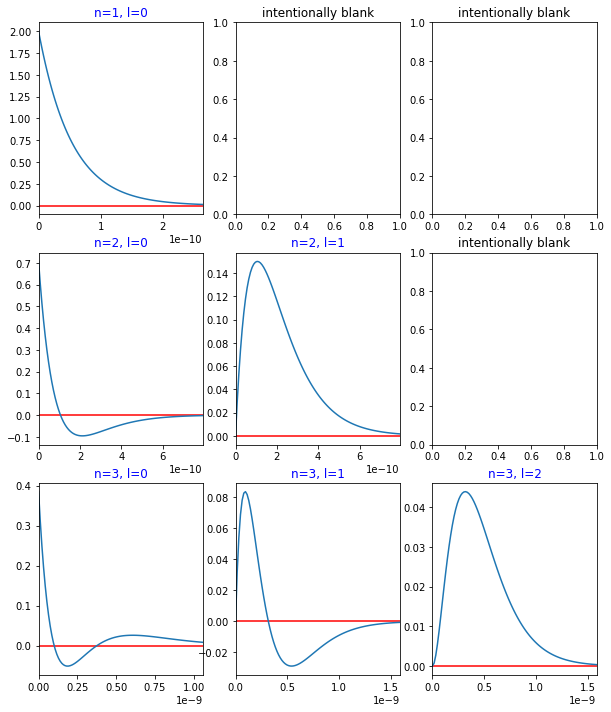

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 12))

parameters = [
    {'n': 1, 'l': 0, 'x_scaler': 5, 'yscaler': (ha.z / ha.a0)**(3/2) },
    {'n': 2, 'l': 0, 'x_scaler': 15, 'yscaler': (ha.z / ha.a0)**(3/2) },
    {'n': 3, 'l': 0, 'x_scaler': 20, 'yscaler': (ha.z / ha.a0)**(3/2) },
    {'n': 2, 'l': 1, 'x_scaler': 15, 'yscaler': (ha.z / ha.a0)**(3/2) },
    {'n': 3, 'l': 1, 'x_scaler': 30, 'yscaler': (ha.z / ha.a0)**(3/2) },
    {'n': 3, 'l': 2, 'x_scaler': 30, 'yscaler': (ha.z / ha.a0)**(3/2) }
]

for p in parameters:
    row = p['n'] - 1
    col = p['l']
    ha = HydrogenicAtom(n=p['n'], l=p['l'], ml=0)
    xs = np.linspace(0, ha.a0 * p['x_scaler'], 100)
    ys = [ha.radial(r).real / p['yscaler'] for r in xs]
    ax = axs[row, col]
    ax.set_title(f'n={p["n"]}, l={p["l"]}', color='b')
    ax.set_xlim(min(xs), max(xs))
    ax.axhline(0.0, color='r')
    ax.plot(xs, ys)
    
axs[0, 1].set_title('intentionally blank')
axs[0, 2].set_title('intentionally blank')
axs[1, 2].set_title('intentionally blank')

In [10]:
ha = HydrogenicAtom(n=1, l=0, ml=0)

def integrand(r):
    return ha.radial(r).real / (1 / ha.a0)

quad(integrand, 0, 3)

(0.0, 0.0)